# Homework 4: Data Visualization
- **Name**:  Abhi Ram Condoor
- **UB Username**: acondoor
- **UB Person Number**:  50471025

--- 
## Part 1 - Generate Plots According to Specifications

### Problem 1 - Scatter Plot with a Line

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

############

# (a)load the data & w comments of rows marked with '%'  
  
data = pd.read_csv('scatter_data.csv', comment='%', header=None)

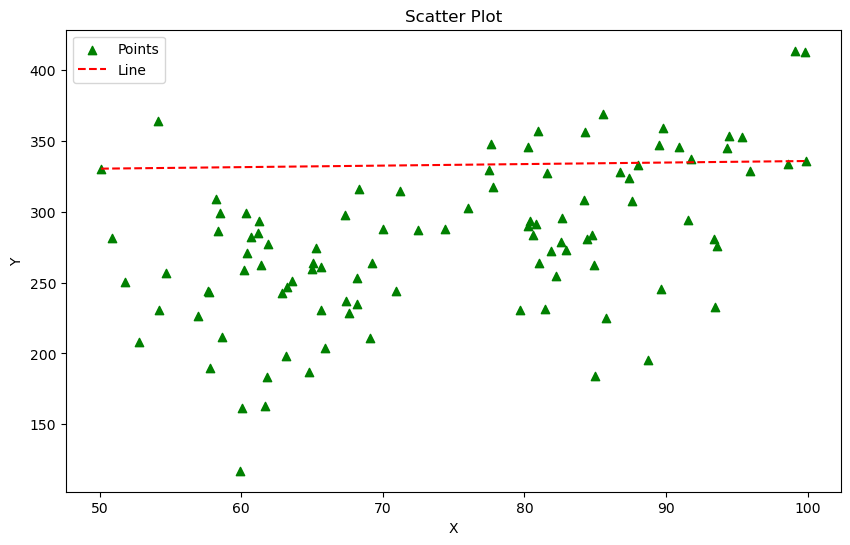

In [10]:
# assigning column names
data.columns = ['x', 'y']

# Plotting
plt.figure(figsize=(10, 6))

############

# b

# Scatter plot - green triangles
plt.scatter(data['x'], data['y'], color='green', marker='^', label='Points')

############

# c

# Line plot - minimum and maximum x values
min_x = data['x'].min()
max_x = data['x'].max()

# y values for min and max x
min_y = data[data['x'] == min_x]['y'].values[0]
max_y = data[data['x'] == max_x]['y'].values[0]

# red dashed line
plt.plot([min_x, max_x], [min_y, max_y], color='red', linestyle='--', label='Line')

############

# d

plt.title('Scatter Plot')

############

# e

plt.xlabel('X'); plt.ylabel('Y')

############

# f

# legend
plt.legend()

# plot
plt.show()


## Problem 2: Histogram

Text(0.5, 1.0, 'Grade Distribution')

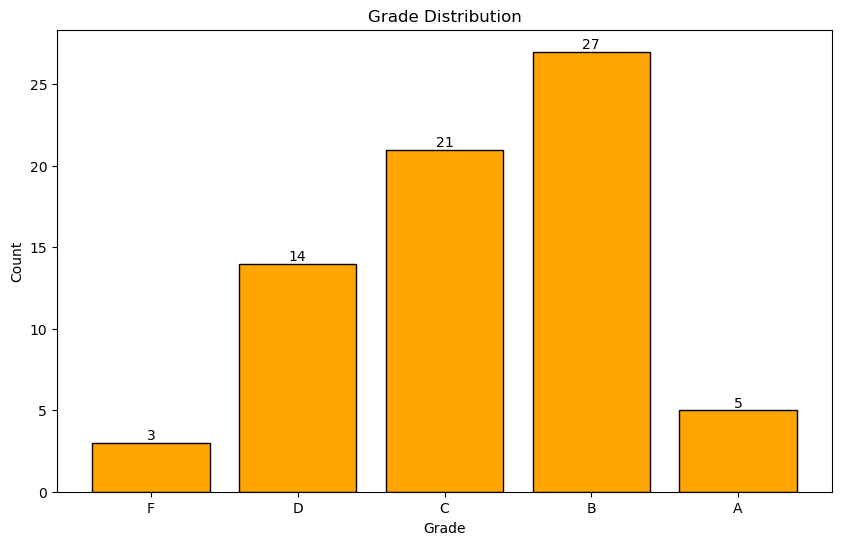

In [11]:
# (a)
# Read data, ignore rows start with '%'
grades_data = pd.read_csv('student_grades.csv', comment='%')

# (b) and (c)
# define bins - letter grades
bins = [0, 60, 70, 80, 90, 100]
labels = ['F', 'D', 'C', 'B', 'A']

# pd.cut to categorize average scores to bins
grades_data['Grade'] = pd.cut(grades_data.iloc[:, 1], bins, labels=labels, right=False)

# count the frequency of each grade
grade_counts = grades_data['Grade'].value_counts(sort=False)

# plot-histogram
plt.figure(figsize=(10, 6))

# histogram plot with counts
plt.bar(grade_counts.index, grade_counts, color='orange', edgecolor='black')

# (d)
# display counts
for index, value in grade_counts.items():
    plt.text(index, value, str(value), ha='center', va='bottom')

# (e)
# labels
plt.xlabel('Grade')
plt.ylabel('Count')

# (f)
# title
plt.title('Grade Distribution')


### Problem 3 - Barplot and Boxplot in the Same Figure

In [12]:
# (a)
# read the CSV file, skip rows starting with '%'
solution_data = pd.read_csv('solution_data.csv', comment='%')
solution_data.columns=["ID","Solution Approach","OFV"]

# calculate optimality gap for each heuristic
optimal_ofv = solution_data[solution_data['Solution Approach'] == 'optimal']['OFV'].values[0]
solution_data['Optimality Gap'] = solution_data.apply(
    lambda row: ((optimal_ofv - row['OFV']) / optimal_ofv) * 100 if row['Solution Approach'] != 'optimal' else 0, 
    axis=1
)




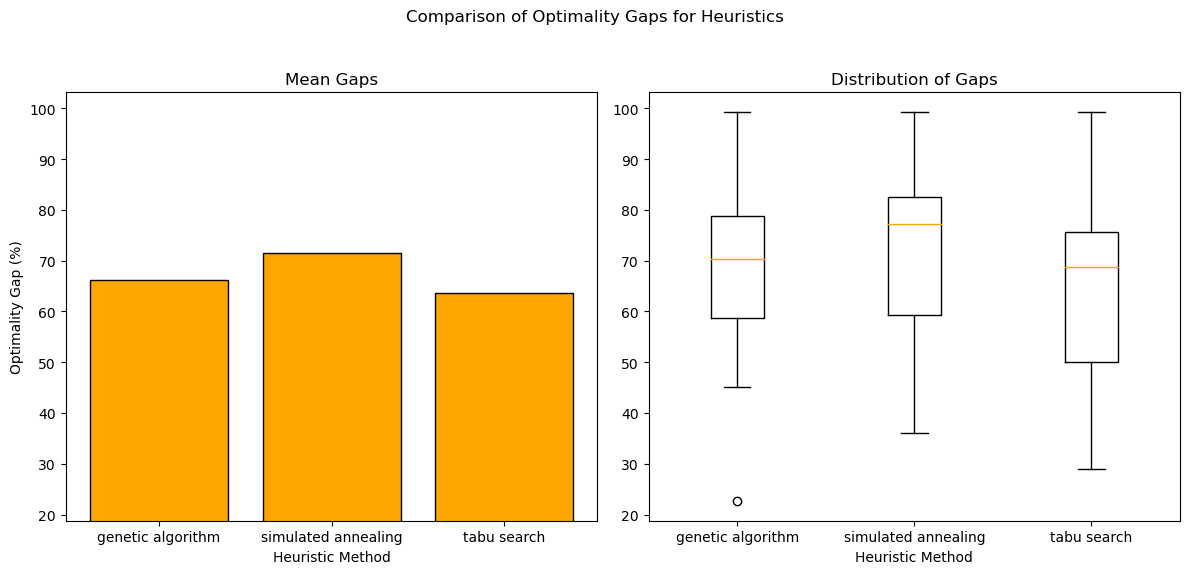

In [13]:
# (b)
# create a single figure with two subplots
plt.figure(figsize=(12, 6))
plt.suptitle('Comparison of Optimality Gaps for Heuristics')

# first subplot - barplot
plt.subplot(1, 2, 1)
average_gaps = solution_data[solution_data['Solution Approach'] != 'optimal'].groupby('Solution Approach')['Optimality Gap'].mean()
plt.bar(average_gaps.index, average_gaps.values, color='orange', edgecolor='black')
plt.xlabel('Heuristic Method')
plt.ylabel('Optimality Gap (%)')
plt.title('Mean Gaps')

# second subplot - boxplot
plt.subplot(1, 2, 2)
heuristic_data = solution_data[solution_data['Solution Approach'] != 'optimal']
plt.boxplot([heuristic_data[heuristic_data['Solution Approach'] == heuristic]['Optimality Gap'] for heuristic in average_gaps.index], 
            labels=average_gaps.index, medianprops={'color': 'orange'})
plt.xlabel('Heuristic Method')

plt.title('Distribution of Gaps')

# Set the same y-axis scale for both plots
ymin, ymax = plt.ylim()
plt.subplot(1, 2, 1).set_ylim(ymin, ymax)

# Show the plots
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust the padding between and around subplots
plt.show()

--- 
## Part 2 - Explore New Plot Types

For this task, I'll choose a Seaborn example plot type and find which is a method of plotting numeric data and can be a good way to show distributions of data across different categories. Violin plots can include a kernel density estimation of the underlying distribution.

- **URL of Example Code**:  https://seaborn.pydata.org/examples/grouped_violinplots.html
- **URL of Sample Data**:  https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data

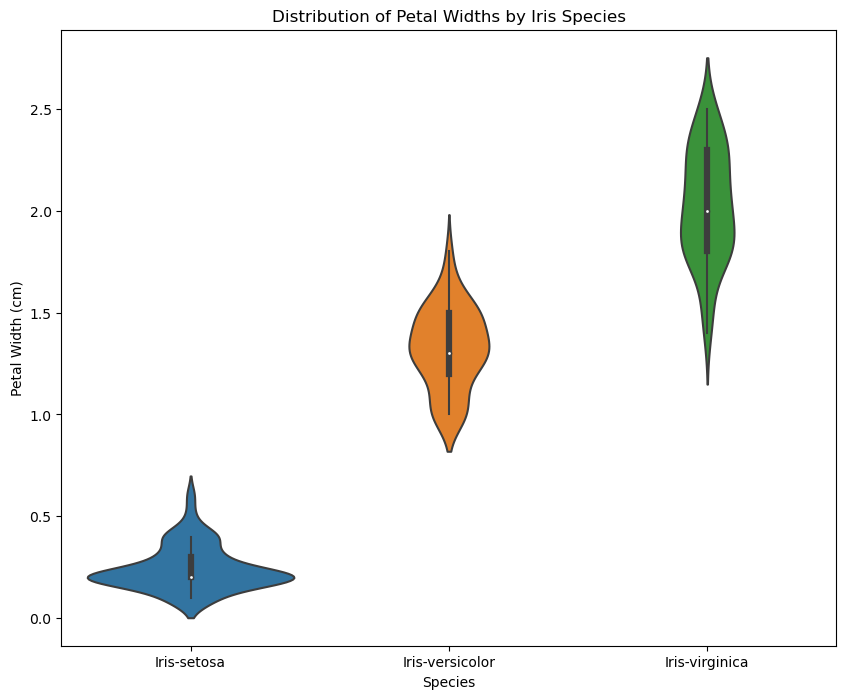

In [6]:
import seaborn as sns


# load data
iris_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
                        names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'])

# create - violin plot
plt.figure(figsize=(10, 8))
sns.violinplot(x='species', y='petal_width', data=iris_data)

# add title and labels
plt.title('Distribution of Petal Widths by Iris Species')
plt.xlabel('Species')
plt.ylabel('Petal Width (cm)')

# display the plot
plt.show()


# Explanation of the Code
We start by importing necessary libraries: seaborn for plotting, pandas for data handling, 
and matplotlib.pyplot for customization. Next, we load the Iris dataset from the UCI Machine Learning 
Repository using pandas' read_csv. Column names are provided as the dataset lacks a header.
We create a violin plot using Seaborn's violinplot, specifying 'species' for the x-axis and 
'sepal_length' for the y-axis. To ensure readability, we set the figure size with plt.figure and 
add a title and axis labels using plt.title, plt.xlabel, and plt.ylabel.

Finally, we display the plot with plt.show."
### This script will create a violin plot that visually represents the distribution of sepal lengths for each species of Iris in the dataset, showing both the range of values and the probability density of the data at different values.